In [1]:
# mnist:手寫數字資料
from tensorflow.keras.datasets.mnist import load_data

# 輸入: x 輸出: y 
# 訓練(帶回家的): train 測試(小考): test
# ((訓練圖片 訓練答案), (測試圖片 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
!pip install scikit-learn

In [5]:
import pandas as pd
print(y_train[0])
# pandas(pd):表格工具 pd.DataFrame: 把東西轉換成表格
pd.DataFrame(x_train[0])

5


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


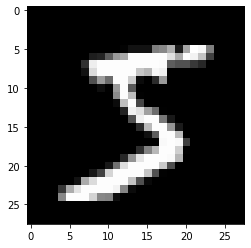

In [8]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap="gray")

In [10]:
# 創造我們模型: 完整模型model 一層一層layer
# Sequential: layer一定會堆在前一層的上面
from tensorflow.keras.models import Sequential
# Dense: 稠密層/全連接層
from tensorflow.keras.layers import Dense
layers = [
    # 128:128根神經, input_dim:784(28*28)
    Dense(128, activation="sigmoid", input_dim=784),
    Dense(10, activation="sigmoid")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 輸出一個: binary crossentropy
# 輸出多個: categorical crossentropy
model.compile(loss="mse",
       metrics=["accuracy"])

In [12]:
# 預處理
# x: 1.reshape 2.scaling
# y: one-hot
from tensorflow.keras.utils import to_categorical
x_train_r = x_train.reshape(-1, 784) / 255
x_test_r = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(x_train_r.shape)
print(y_train_cat[0])
print(y_train[0])

(60000, 784)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mlp.h5", save_best_only=True)
]
# validation_split: 切出一部分資料驗證
# batch_size: 看多少筆才做一次調整(梯度下降)
# epochs: 訓練次數(60000-6000筆/epoch)
# 1 epoch 多少次梯度下降: 54000 / 200 -> 270
# verbose: 印出多少log(1:default 0:quiet 2:)
model.fit(x_train_r, 
     y_train_cat,
     validation_split=0.1,
     batch_size=200,
     epochs=270,
     verbose=2,
     callbacks=callbacks)

Epoch 1/270
270/270 - 3s - loss: 0.0420 - accuracy: 0.7975 - val_loss: 0.0172 - val_accuracy: 0.9203 - 3s/epoch - 11ms/step
Epoch 2/270
270/270 - 0s - loss: 0.0171 - accuracy: 0.9089 - val_loss: 0.0119 - val_accuracy: 0.9363 - 358ms/epoch - 1ms/step
Epoch 3/270
270/270 - 0s - loss: 0.0134 - accuracy: 0.9251 - val_loss: 0.0099 - val_accuracy: 0.9472 - 365ms/epoch - 1ms/step
Epoch 4/270
270/270 - 0s - loss: 0.0115 - accuracy: 0.9353 - val_loss: 0.0087 - val_accuracy: 0.9535 - 377ms/epoch - 1ms/step
Epoch 5/270
270/270 - 0s - loss: 0.0101 - accuracy: 0.9428 - val_loss: 0.0078 - val_accuracy: 0.9593 - 360ms/epoch - 1ms/step
Epoch 6/270
270/270 - 0s - loss: 0.0091 - accuracy: 0.9486 - val_loss: 0.0071 - val_accuracy: 0.9637 - 363ms/epoch - 1ms/step
Epoch 7/270
270/270 - 0s - loss: 0.0083 - accuracy: 0.9531 - val_loss: 0.0066 - val_accuracy: 0.9647 - 375ms/epoch - 1ms/step
Epoch 8/270
270/270 - 0s - loss: 0.0076 - accuracy: 0.9574 - val_loss: 0.0062 - val_accuracy: 0.9677 - 391ms/epoch - 1ms

In [14]:
model.evaluate(x_test_r, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 0.9785


[0.003938690759241581, 0.9785000085830688]

In [15]:
# sklearn: predict_proba/predict
# keras: predict/predict_classes
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_r)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(真實)".format(i) for i in range(10)],
       columns=["{}(預測)".format(i) for i in range(10)])

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0][:200]
false_pre = pre[idx]
false_ori = y_test[idx]
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(false_ori[i], false_pre[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
# PIL(pillow)
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
fn = input("檔名")
# img = Image.open(fn).resize((28, 28)).convert("L")
img = load_img(fn, target_size=(28, 28)).convert("L")
img = np.array(img)
img_r = img.reshape(1, 784) / 255
proba = model.predict(img_r)[0]
for i in range(10):
    print(i, "的機率:", round(proba[i], 3))
ans = model.predict_classes(img_r)[0]
print("答案:", ans)
plt.imshow(img)